# Exploratory Data Analysis

<img width="700" src="https://media.licdn.com/dms/image/D5612AQGopRab2PsZsA/article-cover_image-shrink_720_1280/0/1687927455560?e=2147483647&v=beta&t=T6vNp76xfysGc5bVWC4_P-chVw0azZ5c9AqJW4SIal4" />

## Libraries Import

In [29]:
import nltk
import spacy
import string
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from enelvo.normaliser import Normaliser
from typing import List


#### NLTK Complements

In [30]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/joao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/joao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Load Pretrained Model

In [31]:
spacy_model = spacy.load("en_core_web_md")
spacy_model

#### Setting Stopwords

In [32]:
stops = set(stopwords.words("english"))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Read Data

In [33]:
songs = pd.read_csv("../data/songs.csv")
songs

,name,artist,type,url,popularity,duration (ms),release_date,lyrics
0,You Shook Me All Night Long,AC/DC,album,https://open.spotify.com/track/2SiXAy7TuUkycRV...,85,210173,1980-07-25,53 ContributorsYou Shook Me All Night Long Lyr...
1,Back In Black,AC/DC,album,https://open.spotify.com/track/08mG3Y1vljYA6bv...,84,255493,1980-07-25,72 ContributorsTranslationsPortuguêsBack in Bl...
2,Thunderstruck,AC/DC,album,https://open.spotify.com/track/57bgtoPSgt236Hz...,84,292880,1990-09-24,70 ContributorsTranslationsDeutschThunderstruc...
3,Highway to Hell,AC/DC,album,https://open.spotify.com/track/2zYzyRzz6pRmhPz...,83,208400,1979-07-27,100 ContributorsTranslationsDeutschHighway to ...
4,T.N.T.,AC/DC,album,https://open.spotify.com/track/7LRMbd3LEoV5wZJ...,78,214666,1976-05-14,45 ContributorsT.N.T. Lyrics\nOi! Oi! Oi! Oi! ...
5,Hells Bells,AC/DC,album,https://open.spotify.com/track/69QHm3pustz01CJ...,75,312293,1980-07-25,49 ContributorsHells Bells Lyrics\n\nI'm a rol...
6,Shoot to Thrill,AC/DC,album,https://open.spotify.com/track/0C80GCp0mMuBzLf...,73,317426,1980-07-25,26 ContributorsShoot to Thrill Lyrics\nAll you...
7,Dirty Deeds Done Dirt Cheap,AC/DC,album,https://open.spotify.com/track/2d4e45fmUnguxh6...,73,231933,1976-09-20,81 ContributorsDirty Deeds Done Dirt Cheap Lyr...
8,It's a Long Way to the Top (If You Wanna Rock ...,AC/DC,album,https://open.spotify.com/track/7nemcVsXVFZF01i...,71,301226,1976-05-14,32 ContributorsIt’s a Long Way to the Top (If ...
9,Rock N Roll Train,AC/DC,album,https://open.spotify.com/track/4feXJ5IC3avXsVW...,68,261506,2008-10-20,11 ContributorsRock N’ Roll Train Lyrics\nOne ...


## Clean Song Lyrics

In [34]:
def clean_text(text: str) -> List[str]:

    normaliser = Normaliser(tokenizer="readable")
    normal_text = normaliser.normalise(text)

    tokens = word_tokenize(normal_text)

    no_point_tokens = [w for w in tokens if w not in string.punctuation]
    no_stopwords_tokens = [w.lower() for w in no_point_tokens if w.lower() not in stops]

    conj_token = " ".join(no_stopwords_tokens)

    _object = spacy_model(conj_token)
    lemma_tokens = [w.lemma_ for w in _object]

    return lemma_tokens

In [35]:
songs["processed_lyrics"] = songs["lyrics"].apply(lambda x: " ".join(clean_text(x)))

#### Save cleaned songs

In [36]:
songs.to_csv("../data/cleaned_songs.csv", index = None)

## Group all song lyrics

In [37]:
grouped_tokens = []
for song in songs["processed_lyrics"]:
    grouped_tokens += word_tokenize(song)

grouped_tokens = [w for w in grouped_tokens if w not in ("'", "...", "`", "m", "'s", "chocado", "53", "não", "te")]
grouped_tokens

['contributorsyou',
 'night',
 'long',
 'remix',
 'fast',
 'machine',
 'feral',
 'motor',
 'clean',
 'good',
 'damn',
 'woman',
 'ai',
 'ever',
 'sêman',
 'sigle',
 'eye',
 'til',
 'lie',
 'hold',
 'american',
 'triga',
 'parking',
 'share',
 'fighting',
 'air',
 'say',
 'come',
 'ai',
 'already',
 'cause',
 'salle',
 'start',
 'smoke',
 'earth',
 'parking',
 'mind',
 'anhinga',
 'cere',
 'maringá',
 'night',
 'long',
 'yeah',
 'night',
 'long',
 'work',
 'double',
 '-',
 'time',
 'seduction',
 'line',
 'one',
 'kind',
 'a',
 '-',
 'mine',
 'mine',
 'want',
 'apela',
 '-',
 'se',
 'another',
 'course',
 'make',
 'meal',
 'outa',
 'come',
 'back',
 'cool',
 'take',
 'another',
 'round',
 'back',
 'ring',
 'take',
 'another',
 'swing',
 'salles',
 'cere',
 'smoke',
 'earth',
 'parking',
 'mind',
 'anhinga',
 'cere',
 'maringá',
 'night',
 'long',
 'yeah',
 'night',
 'long',
 'knock',
 'night',
 'long',
 'smoking',
 'night',
 'long',
 'yeah',
 'well',
 'book',
 'might',
 'also',
 'like',


## Plot Words Frequency Graph

In [44]:
def plot_frequency(tokens):
    plt.figure(figsize=(20, 5))
    fd = nltk.FreqDist(tokens)
    fd.plot(30, title="Words Frequency Graph")

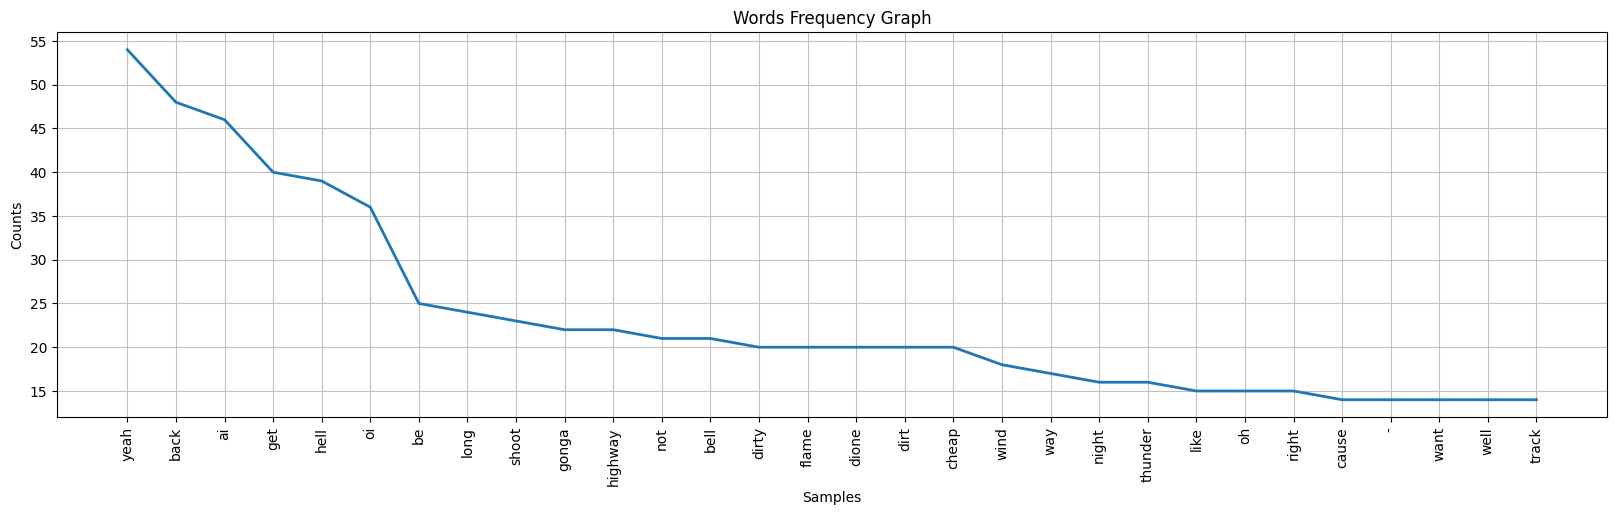

In [45]:
plot_frequency(grouped_tokens)

## Plot Words Cloud

In [40]:
def _wordcloud(text: List[str]) -> None:
    text = " ".join(text)
    cloud = WordCloud(
        background_color="black", width=2000, height=800, collocations=False
    ).generate(text)
    plt.figure(figsize=(20, 10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

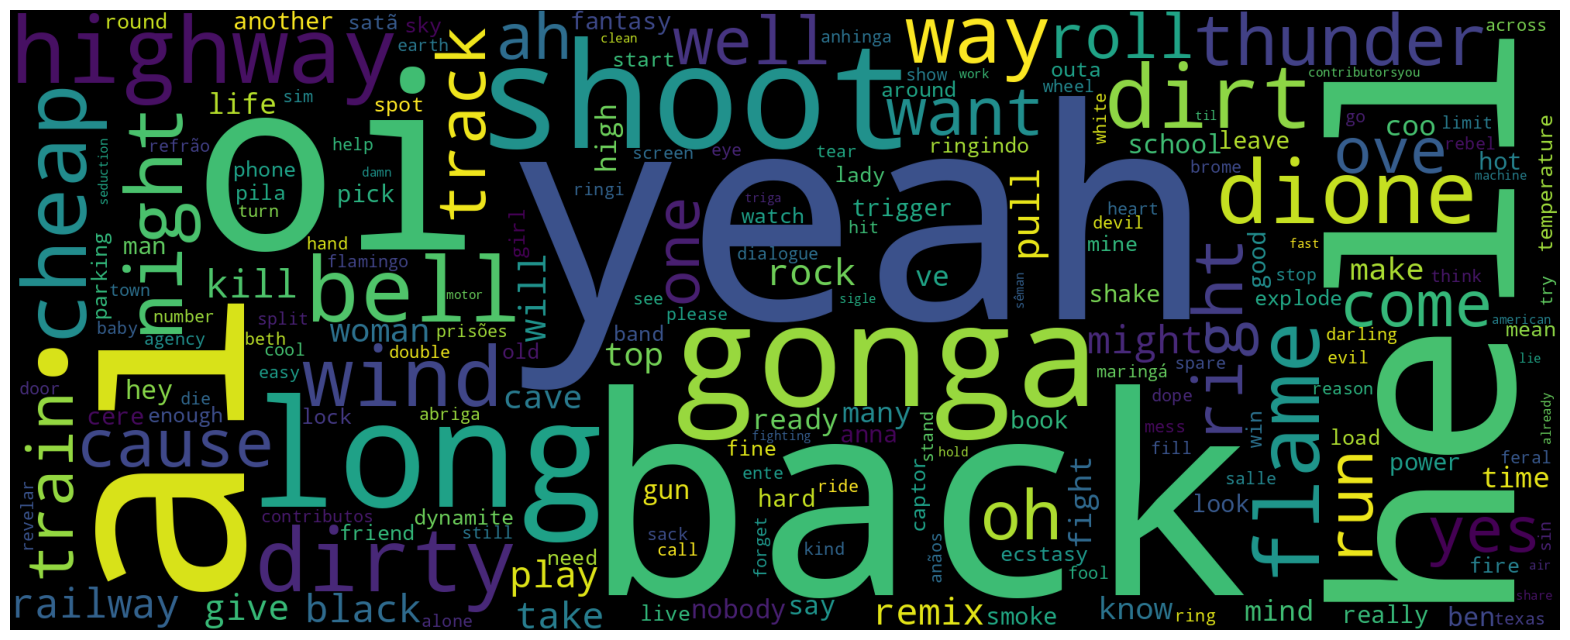

In [41]:
_wordcloud(grouped_tokens)